In [109]:
import pandas as pd 
import numpy as np


In [110]:
car= pd.read_csv("D:\\pa\\datasets_33080_1320127_CAR DETAILS FROM CAR DEKHO.csv")
car.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [111]:
car_data = pd.read_csv("D:\\pa\\datasets_33080_1320127_car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [112]:
car.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [113]:
car.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [114]:
car['fuel'].isnull().sum()

0

In [115]:
car.shape


(4340, 8)

In [116]:
car_data.shape

(301, 9)

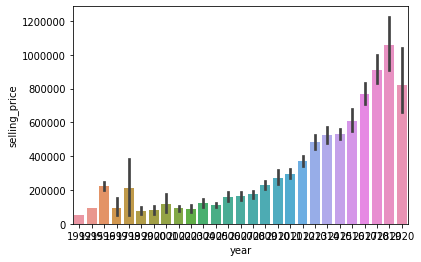

In [117]:
import seaborn as sns
sns.barplot(x='year', y='selling_price', data = car)

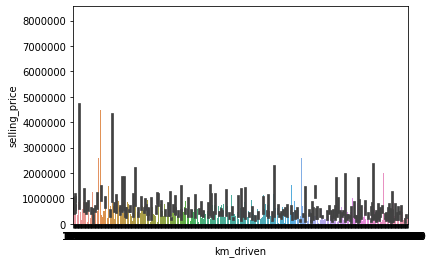

In [118]:
sns.barplot(x='km_driven', y='selling_price', data = car)

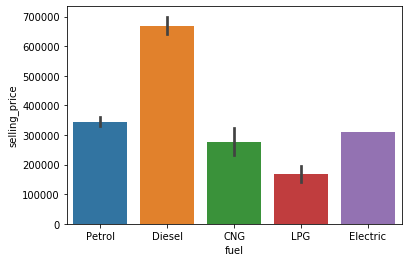

In [119]:
sns.barplot(x='fuel', y='selling_price', data = car)

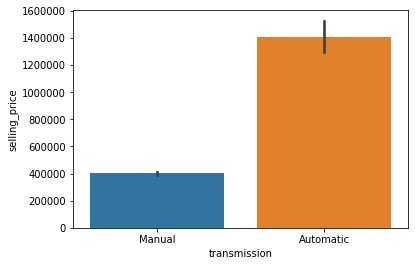

In [120]:
sns.barplot(x='transmission', y='selling_price', data = car)


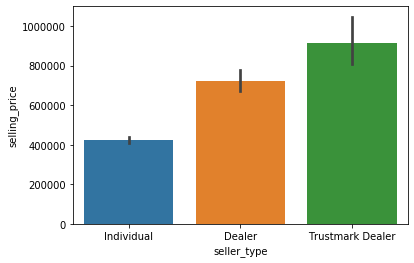

In [121]:
sns.barplot(x='seller_type', y='selling_price', data = car)


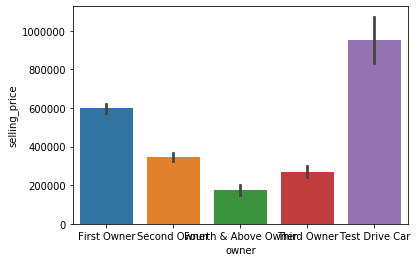

In [122]:
sns.barplot(x='owner', y='selling_price', data = car)


In [123]:
owner = car['fuel'].value_counts()
owner

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [124]:
#Check Point
df= car.copy()

In [125]:
df['fuel'] = car['fuel'].map({'Petrol':0, 'Diesel':1, 'CNG fuel':2, 'LPG':3, 'Electric':4})
df['seller_type'] = car['seller_type'].map({'Individual':0, 'Dealer':1, 'Trustmark Dealer':2})
df['transmission'] = car['transmission'].map({'Manual':0, 'Automatic':1})
df['owner'] = car['owner'].map({'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4})

In [126]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0.0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0.0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1.0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0.0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1.0,0,0,1
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,1.0,0,0,1
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,1.0,0,0,1
4337,Maruti 800 AC BSIII,2009,110000,83000,0.0,0,0,1
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,1.0,0,0,0


In [127]:

n = df['fuel'].mean()
df['fuel'].fillna(n,inplace = True)
x.isnull().sum()

year            0
km_driven       0
fuel            0
transmission    0
seller_type     0
owner           0
dtype: int64

In [128]:
x = df[['year','km_driven','fuel','transmission','seller_type','owner']]
y = df[['selling_price']]

In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y , test_size = 0.25 , random_state =0)


In [130]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(x,y)
print('coifient:',lm.coef_)
print('Intercept:',lm.intercept_)
print('Rsquare:',lm.score(x,y))

coifient: [[ 3.87390486e+04 -7.76600938e-01  2.38475071e+05  8.68607205e+05
   9.34054310e+04 -9.69720650e+03]]
Intercept: [-77664045.03682943]
Rsquare: 0.4464770595819201


In [157]:
y_pred = lm.predict(x_test)
print(y_pred)

[[ 7.25340055e+00]
 [-4.29941833e-01]
 [ 4.34421046e+00]
 [ 8.81312466e+00]
 [ 1.44122325e+01]
 [ 4.99017932e+00]
 [ 3.55270080e+00]
 [ 1.49857267e+00]
 [ 5.40618704e+00]
 [ 4.70971492e+00]
 [ 2.25161030e+00]
 [ 1.68015445e+00]
 [ 5.18119641e+00]
 [ 7.72729986e+00]
 [ 8.39443191e+00]
 [ 1.44521769e+01]
 [ 7.48865002e+00]
 [ 4.31534522e+00]
 [-4.83019261e-01]
 [ 2.46637358e+00]
 [ 5.02766258e+00]
 [ 4.20263567e+00]
 [ 6.54345419e+00]
 [ 8.28424653e+00]
 [-2.01988022e+00]
 [ 2.00635971e+00]
 [-8.87148443e-01]
 [ 8.37152247e-01]
 [ 2.52855490e-03]
 [ 7.22757340e+00]
 [ 3.41063197e+00]
 [ 7.15773857e+00]
 [ 7.33933857e-01]
 [ 7.69192117e+00]
 [ 3.55217497e+00]
 [ 1.87317957e+00]
 [ 5.69543311e+00]
 [ 6.69840566e+00]
 [-2.48371815e+00]
 [ 8.89067304e+00]
 [ 9.03506476e+00]
 [ 2.02551908e+01]
 [ 4.47287811e+00]
 [ 4.23010072e+00]
 [ 6.35624511e+00]
 [ 9.69269432e+00]
 [ 1.15261469e-01]
 [ 1.74321399e+00]
 [ 5.22101663e+00]
 [ 7.07923989e+00]
 [ 8.25992494e+00]
 [ 4.25937828e+00]
 [ 4.9597849

# car data dataset

In [131]:
car_data = pd.read_csv("D:\\pa\\datasets_33080_1320127_car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [132]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [144]:
print(car_data['Fuel_Type'].unique())
print(car_data['Seller_Type'].unique())
print(car_data['Transmission'].unique())
print(car_data['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [147]:
df1 = car_data.copy()

In [148]:
df1['Fuel_Type'] = car_data['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})
df1['Seller_Type'] = car_data['Seller_Type'].map({'Individual':0, 'Dealer':1})
df1['Transmission'] = car_data['Transmission'].map({'Manual':0, 'Automatic':1})
#df1['owner'] = car['owner'].map({'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4})

In [149]:
df1

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,1,0,0
1,sx4,2013,4.75,9.54,43000,1,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,1,0,0
4,swift,2014,4.60,6.87,42450,1,1,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,1,0,0
297,brio,2015,4.00,5.90,60000,0,1,0,0
298,city,2009,3.35,11.00,87934,0,1,0,0
299,city,2017,11.50,12.50,9000,1,1,0,0


In [154]:
x = df1[['Year','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
y = df1[['Selling_Price']]

In [155]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y , test_size = 0.25 , random_state =0)


In [156]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(x,y)
print('coifient:',lm.coef_)
print('Intercept:',lm.intercept_)
print('Rsquare:',lm.score(x,y))

coifient: [[ 4.03947271e-01  4.45986832e-01 -6.37410323e-06  1.49298752e+00
   1.10367889e+00  1.43041666e+00 -6.80557441e-01]]
Intercept: [-813.09804338]
Rsquare: 0.8785205982910804


In [170]:
new_input = pd.DataFrame({'Year':2017,'Present_Price':9.85,'Kms_Driven':6900,'Fuel_Type':'Petrol','Seller_Type':'Dealer','Transmission':'Manual','Owner':0},index=[0])
#2014	3.35	5.59	27000	0	1	0	0
#2013	4.75	9.54	43000	1	1	0	0
#2017	7.25	9.85	6900	0	1	0	0
#2011	2.85	4.15	5200	0	1	0	0

In [171]:
df2= new_input.copy()
df2['Fuel_Type'] = new_input['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})
df2['Seller_Type'] = new_input['Seller_Type'].map({'Individual':0, 'Dealer':1})
df2['Transmission'] = new_input['Transmission'].map({'Manual':0, 'Automatic':1})

In [172]:
y_pred = lm.predict(df2)
print(y_pred)

[[7.11626916]]
